In [84]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import glob
import cv2
import os 
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from keras.applications import ResNet50V2, VGG19
from keras.callbacks import EarlyStopping
from keras import models
from keras.layers import Dropout, Flatten, Dense 
from keras.optimizers import SGD,Adam
from keras.models import load_model
from keras.utils import to_categorical 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import math 


In [2]:
train_path = "data/split2/train/"
test_path = "data/split2/test/"
val_path = "data/split2/val/"

In [3]:
cd ..

/Users/miafryer/Documents/flatiron/pneumonia_CT_scan


In [4]:
imgs_bacteria = [file for file in os.listdir(train_path+'BACTERIA') if file.endswith('.jpeg')]
len(imgs_bacteria)

1668

In [5]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_path, target_size=(64, 64), batch_size = 3514, class_mode='categorical') 

Found 3514 images belonging to 3 classes.


In [6]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_path, 
        target_size=(64, 64), 
        batch_size = 1171,
        class_mode='categorical') 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_path, 
        target_size=(64, 64),
        batch_size = 1171,
        class_mode='categorical')


Found 1171 images belonging to 3 classes.
Found 1171 images belonging to 3 classes.


In [7]:
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

{'BACTERIA': 0, 'NORMAL': 1, 'VIRUS': 2}
{'BACTERIA': 0, 'NORMAL': 1, 'VIRUS': 2}
{'BACTERIA': 0, 'NORMAL': 1, 'VIRUS': 2}


In [8]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
X_train = train_images.reshape((-1, 28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [9]:
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 3514
Number of testing samples: 1171
Number of validation samples: 1171
train_images shape: (3514, 64, 64, 3)
train_labels shape: (3514, 3)
test_images shape: (1171, 64, 64, 3)
test_labels shape: (1171, 3)
val_images shape: (1171, 64, 64, 3)
val_labels shape: (1171, 3)


In [10]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(3514, 12288)
(1171, 12288)
(1171, 12288)


In [13]:
#train_classes = train_generator.classes 
num_classes_train = len(train_generator.class_indices) 
#train_labels_cat = to_categorical(train_classes, num_classes=num_classes_train)

## Base Model

In [48]:
model1 = models.Sequential()
#model1.add(Flatten(input_shape=train_img.shape[1:])) 
model1.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
model1.add(layers.Dense(7, activation='relu'))
model1.add(layers.Dense(5, activation='relu'))
model1.add(layers.Dense(num_classes_train, activation='softmax'))

model1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [49]:
history1 = model1.fit(train_img, train_labels, 
   epochs=10,
   batch_size=50, 
   validation_data=(val_img,val_labels))

Epoch 1/10
71/71 [==============================] - 0s 5ms/step - loss: 1.1344 - accuracy: 0.3497 - val_loss: 1.0746 - val_accuracy: 0.4936
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 1.0677 - accuracy: 0.4736 - val_loss: 1.0564 - val_accuracy: 0.4791
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 1.0479 - accuracy: 0.4803 - val_loss: 1.0311 - val_accuracy: 0.4791
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 1.0294 - accuracy: 0.4918 - val_loss: 1.0508 - val_accuracy: 0.5278
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 1.0163 - accuracy: 0.5244 - val_loss: 0.9979 - val_accuracy: 0.5687
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.9918 - accuracy: 0.5761 - val_loss: 0.9819 - val_accuracy: 0.5594
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.9497 - accuracy: 0.6233 - val_loss: 1.0073 - val_accuracy: 0.4321
Epoch 8/10
71/71 [==

In [51]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 20)                245780    
_________________________________________________________________
dense_37 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 18        
Total params: 245,985
Trainable params: 245,985
Non-trainable params: 0
_________________________________________________________________


## Neural Network 2

In [14]:
mode2 = Sequential() 
#model1.add(Flatten(input_shape=(12288,))) 
model2.add(Flatten(input_shape=train_img.shape[1:])) 
model2.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model2.add(Dropout(0.5)) 
model2.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model2.add(Dropout(0.3)) 
model2.add(Dense(num_classes_train, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])

In [16]:
history2 = model2.fit(train_img, train_labels, 
   epochs=10,
   batch_size=50, 
   validation_data=(val_img , val_labels))

Epoch 1/10
71/71 [==============================] - 1s 9ms/step - loss: 0.7479 - acc: 0.6827 - val_loss: 0.7567 - val_acc: 0.6524
Epoch 2/10
71/71 [==============================] - 1s 9ms/step - loss: 0.7398 - acc: 0.6838 - val_loss: 0.8690 - val_acc: 0.6678
Epoch 3/10
71/71 [==============================] - 1s 8ms/step - loss: 0.7109 - acc: 0.6938 - val_loss: 0.6573 - val_acc: 0.7190
Epoch 4/10
71/71 [==============================] - 1s 9ms/step - loss: 0.7326 - acc: 0.6941 - val_loss: 0.6904 - val_acc: 0.7088
Epoch 5/10
71/71 [==============================] - 1s 9ms/step - loss: 0.6936 - acc: 0.7012 - val_loss: 0.6059 - val_acc: 0.7344
Epoch 6/10
71/71 [==============================] - 1s 8ms/step - loss: 0.6958 - acc: 0.6929 - val_loss: 0.6699 - val_acc: 0.7088
Epoch 7/10
71/71 [==============================] - 1s 9ms/step - loss: 0.6936 - acc: 0.7040 - val_loss: 0.7447 - val_acc: 0.6772
Epoch 8/10
71/71 [==============================] - 1s 8ms/step - loss: 0.6804 - acc: 0.70

In [18]:
(eval_loss, eval_accuracy) = model2.evaluate( 
    test_img , test_labels, batch_size=50, verbose=1)

24/24 [==============================] - 0s 3ms/step - loss: 0.6048 - acc: 0.7259


In [19]:
y_hat_test = model2.predict(test_img) 

In [20]:
categorical_test_labels = pd.DataFrame(test_labels,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_hat_test,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)

<AxesSubplot:>

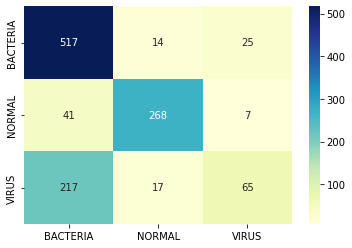

In [21]:
cnf_matrix = confusion_matrix(categorical_test_labels,categorical_preds,labels=['BACTERIA', 'NORMAL' ,'VIRUS'] )
sns.heatmap(cnf_matrix , annot=True, fmt="d",cmap="YlGnBu",xticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'], yticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'])

In [25]:
classification_metrics= classification_report(categorical_test_labels,categorical_preds, target_names=['BACTERIA', 'NORMAL' ,'VIRUS'])
print(classification_metrics)

              precision    recall  f1-score   support

    BACTERIA       0.67      0.93      0.78       556
      NORMAL       0.90      0.85      0.87       316
       VIRUS       0.67      0.22      0.33       299

    accuracy                           0.73      1171
   macro avg       0.74      0.67      0.66      1171
weighted avg       0.73      0.73      0.69      1171



## CNN 1

In [57]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(num_classes_train, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [63]:
data = train_img.reshape(3514,64,64,3)
data_val = val_img.reshape(1171,64,64,3)


history3 = model3.fit(data, train_labels, 
   epochs=10,
   batch_size=100, 
   validation_data=(data_val, val_labels))

Epoch 1/10
36/36 [==============================] - 7s 188ms/step - loss: 1.0365 - acc: 0.4747 - val_loss: 1.0396 - val_acc: 0.5107
Epoch 2/10
36/36 [==============================] - 7s 184ms/step - loss: 1.0233 - acc: 0.4772 - val_loss: 1.0192 - val_acc: 0.4748
Epoch 3/10
36/36 [==============================] - 7s 181ms/step - loss: 1.0002 - acc: 0.5014 - val_loss: 1.0232 - val_acc: 0.5030
Epoch 4/10
36/36 [==============================] - 6s 179ms/step - loss: 0.9753 - acc: 0.5566 - val_loss: 1.0639 - val_acc: 0.4748
Epoch 5/10
36/36 [==============================] - 7s 186ms/step - loss: 0.9539 - acc: 0.5697 - val_loss: 0.9065 - val_acc: 0.6055
Epoch 6/10
36/36 [==============================] - 7s 186ms/step - loss: 0.9133 - acc: 0.5891 - val_loss: 1.4476 - val_acc: 0.4748
Epoch 7/10
36/36 [==============================] - 7s 184ms/step - loss: 0.9026 - acc: 0.6042 - val_loss: 0.9865 - val_acc: 0.5030
Epoch 8/10
36/36 [==============================] - 7s 189ms/step - loss: 0.

In [50]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)             

## CNN 2

In [68]:
model4= models.Sequential()
model4.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model4.add(layers.MaxPool2D(pool_size=2, strides=2))
model4.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model4.add(layers.MaxPool2D(pool_size=2, strides=2))
model4.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(layers.MaxPool2D(pool_size=2, strides=2))
model4.add(layers.Flatten())
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(3, activation='softmax'))

# finally compile and train the cnn
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [69]:
history4 = model4.fit(data, train_labels, 
   epochs=10,
   batch_size=100, 
   validation_data=(data_val, val_labels))

Epoch 1/10
36/36 [==============================] - 8s 221ms/step - loss: 1.0607 - accuracy: 0.4410 - val_loss: 0.8806 - val_accuracy: 0.6200
Epoch 2/10
36/36 [==============================] - 8s 222ms/step - loss: 0.7617 - accuracy: 0.6713 - val_loss: 0.6474 - val_accuracy: 0.7182
Epoch 3/10
36/36 [==============================] - 8s 217ms/step - loss: 0.6443 - accuracy: 0.7281 - val_loss: 0.5825 - val_accuracy: 0.7549
Epoch 4/10
36/36 [==============================] - 8s 217ms/step - loss: 0.5577 - accuracy: 0.7632 - val_loss: 0.6199 - val_accuracy: 0.7310
Epoch 5/10
36/36 [==============================] - 8s 221ms/step - loss: 0.5445 - accuracy: 0.7713 - val_loss: 0.5358 - val_accuracy: 0.7831
Epoch 6/10
36/36 [==============================] - 8s 221ms/step - loss: 0.4964 - accuracy: 0.7918 - val_loss: 0.5169 - val_accuracy: 0.7839
Epoch 7/10
36/36 [==============================] - 8s 223ms/step - loss: 0.4971 - accuracy: 0.7914 - val_loss: 0.5670 - val_accuracy: 0.7677
Epoch 

## Trasnfer learning VGG19

In [99]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (64,64,3), classes = train_labels.shape[1])
model5= models.Sequential()
model5.add(base_model) 
model5.add(Flatten()) 
model5.add(Dense(1024,activation=('relu')))
model5.add(Dense(512,activation=('relu'))) 
model5.add(Dense(256,activation=('relu'))) 
model5.add(Dropout(.3))
#model.add(Dropout(.2))
model5.add(Dense(3,activation=('softmax'))) 

In [100]:
model5.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_14 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_63 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_64 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 3)               

In [101]:
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model5.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [102]:
history5 = model5.fit(data, train_labels, 
   epochs=10,
   batch_size=100, 
   validation_data=(data_val, val_labels))

Epoch 1/10
36/36 [==============================] - 457s 13s/step - loss: 1.0420 - accuracy: 0.4938 - val_loss: 0.6539 - val_accuracy: 0.7165
Epoch 2/10
36/36 [==============================] - 457s 13s/step - loss: 0.6507 - accuracy: 0.7067 - val_loss: 0.5115 - val_accuracy: 0.7942
Epoch 3/10
36/36 [==============================] - 465s 13s/step - loss: 0.5107 - accuracy: 0.7949 - val_loss: 0.5019 - val_accuracy: 0.7950
Epoch 4/10
36/36 [==============================] - 450s 13s/step - loss: 0.4758 - accuracy: 0.8041 - val_loss: 0.4697 - val_accuracy: 0.8121
Epoch 5/10
36/36 [==============================] - 448s 12s/step - loss: 0.4435 - accuracy: 0.8126 - val_loss: 0.4673 - val_accuracy: 0.8087
Epoch 6/10
36/36 [==============================] - 445s 12s/step - loss: 0.4061 - accuracy: 0.8339 - val_loss: 0.5194 - val_accuracy: 0.8002
Epoch 7/10
36/36 [==============================] - 452s 13s/step - loss: 0.4210 - accuracy: 0.8333 - val_loss: 0.4680 - val_accuracy: 0.8155
Epoch 

In [ ]:
cnf_matrix = confusion_matrix(categorical_test_labels,categorical_preds,labels=['BACTERIA', 'NORMAL' ,'VIRUS'] )
sns.heatmap(cnf_matrix , annot=True, fmt="d",cmap="YlGnBu",xticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'], yticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'])
